In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sklearn
from keras.layers import Dense
from keras import activations
from keras import Sequential
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('city_day.csv')
print(df)


                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [36]:
# Create the dataframe
colName = 'PM2.5'
df[colName] = df[colName].fillna(0) 
colName = 'PM10'
df[colName] = df[colName].fillna(0) 
colName = 'NO'
df[colName] = df[colName].fillna(0) 
colName = 'NO2'
df[colName] = df[colName].fillna(0) 
colName = 'NOx'
df[colName] = df[colName].fillna(0) 
colName = 'NH3'
df[colName] = df[colName].fillna(0) 
colName = 'CO'
df[colName] = df[colName].fillna(0) 
colName = 'SO2'
df[colName] = df[colName].fillna(0) 
colName = 'O3'
df[colName] = df[colName].fillna(0) 
colName = 'Benzene'
df[colName] = df[colName].fillna(0) 
colName = 'Toluene'
df[colName] = df[colName].fillna(0) 
colName = 'Xylene'
df[colName] = df[colName].fillna(0) 
colName = 'AQI'
df[colName] = df[colName].fillna(0)  

In [37]:
corr = df.corr()
print(corr)

            PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.368414  0.469201  0.433199  0.382211  0.156542  0.112753   
PM10     0.368414  1.000000  0.404500  0.330189  0.382156  0.225860 -0.050369   
NO       0.469201  0.404500  1.000000  0.498892  0.737456  0.170952  0.233470   
NO2      0.433199  0.330189  0.498892  1.000000  0.592442  0.169636  0.369183   
NOx      0.382211  0.382156  0.737456  0.592442  1.000000  0.157394  0.244745   
NH3      0.156542  0.225860  0.170952  0.169636  0.157394  1.000000 -0.073566   
CO       0.112753 -0.050369  0.233470  0.369183  0.244745 -0.073566  1.000000   
SO2      0.164249  0.148613  0.215860  0.432338  0.218174 -0.057805  0.478023   
O3       0.287599  0.280985  0.120967  0.393205  0.165240  0.150708  0.071831   
Benzene  0.045836  0.042174  0.056948  0.064258  0.067660  0.025507  0.069523   
Toluene  0.167762  0.108695  0.170338  0.330047  0.208759  0.019561  0.290802   
Xylene   0.108134  0.016662 

C:\Users\suckm\AppData\Local\Temp\ipykernel_18128\92767312.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


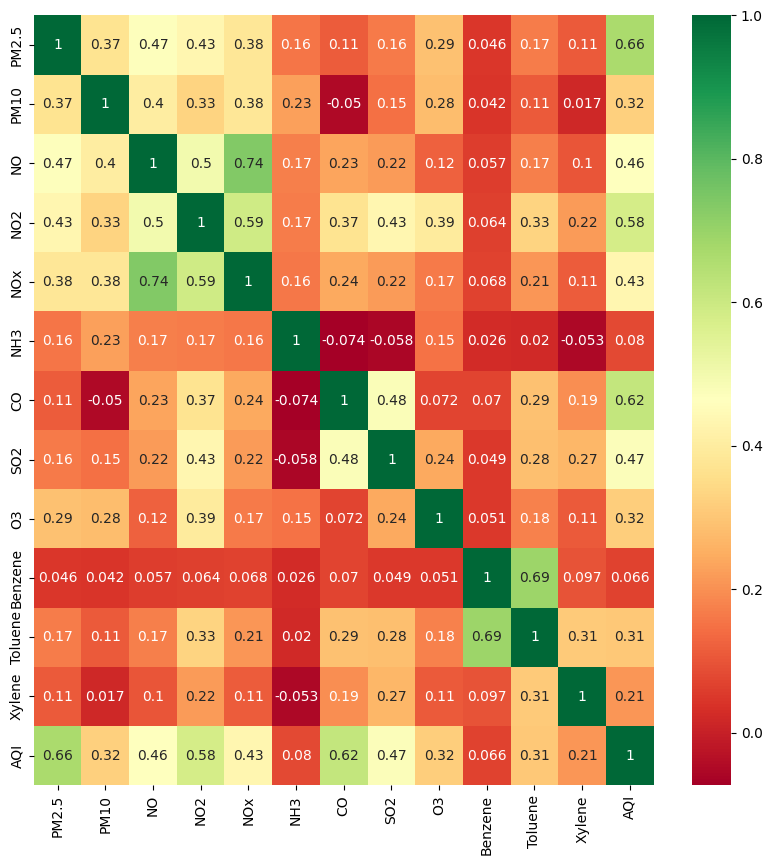

In [38]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corr,cmap='RdYlGn', annot = True)
plt.show()

In [39]:
layers = [256,64]
x = df.iloc[:,2:15]
y = df.iloc[:,2]
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size = 0.33, random_state = 100)
ln = linear_model.LinearRegression()
ln.fit(train_x,train_y)
predict_y = ln.predict(test_x)
result = pd.DataFrame({'Actual':test_y, 'Predict': predict_y})
print(result)
mse = mean_squared_error(test_y, predict_y)
r2 = r2_score(test_y, predict_y)
print('mse: ', mse)
print('r2: ', r2)

       Actual  Predict
16436   40.20    40.20
19343  206.83   206.83
9377    34.61    34.61
23118   16.94    16.94
17247   48.68    48.68
...       ...      ...
16157   39.66    39.66
8801    56.97    56.97
24246   48.00    48.00
11146   47.17    47.17
24331   97.21    97.21

[9746 rows x 2 columns]
mse:  4.815096041517587e-25
r2:  1.0


In [50]:
layers = [256,64]
print(layers)

#tạo mạng nơron
model = Sequential()
for layer in layers:
    model.add(Dense(layer, activation=activations.relu))
model.add(Dense(1, activation=activations.sigmoid))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#huan luyen mo hinh bang train data
history = model.fit(train_x, train_y, validation_data=(test_x,test_y), epochs=200, batch_size=6969)


[256, 64]
Epoch 1/200
3/3 [==============================] - 1s 159ms/step - loss: -254.8837 - accuracy: 0.0550 - val_loss: -2291.4434 - val_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 67ms/step - loss: -3058.8682 - accuracy: 0.0000e+00 - val_loss: -5177.8823 - val_accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 86ms/step - loss: -5828.8638 - accuracy: 0.0000e+00 - val_loss: -8182.8999 - val_accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 73ms/step - loss: -8703.0234 - accuracy: 0.0000e+00 - val_loss: -11372.1113 - val_accuracy: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 69ms/step - loss: -11869.5527 - accuracy: 0.0000e+00 - val_loss: -15091.8594 - val_accuracy: 0.0000e+00
Epoch 6/200
3/3 [==============================] - 0s 63ms/step - loss: -15639.8438 - accuracy: 0.0000e+00 - val_loss: -19510.0918 - val_accuracy: 0.0000e+00
Epoch 7/200
3/3 [==============================] - 0s

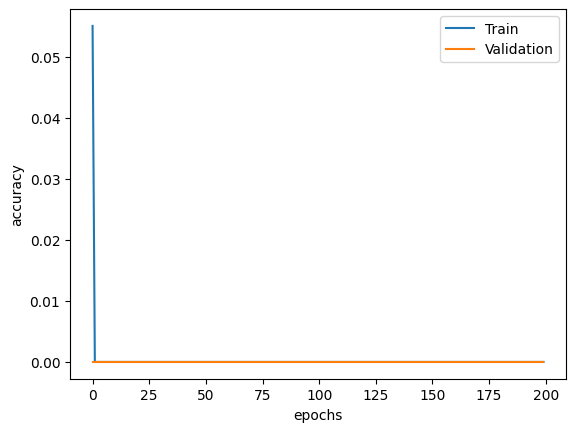

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

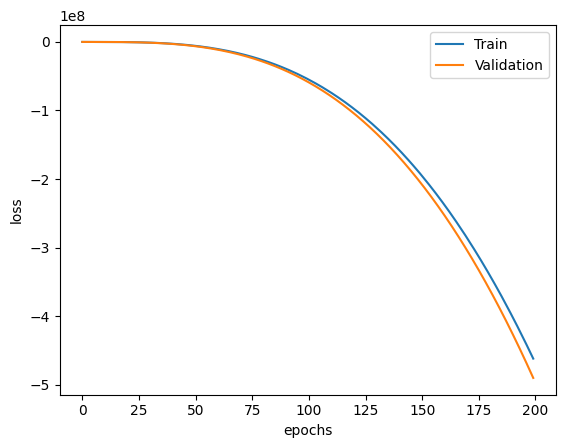

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()